In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
iris = load_iris()

In [3]:
# in this case we have to build a binary classifier 
# thus we will classify data as setosa and non setosa
# setosa flowers have smaller seplal length and wider sepal width so it easy to distiguish from others
# while other two are hard to distinguish among themseleves
# that's why while classifiying as setosa and non setosa we use only sepal length and sepal width
X = iris.data[:, :2]#select all rows and first two columns
y = iris.target
# y=0 -> it is setosa
# class belonged to setosa are labeled as -1
# and other two ie. non setosa as 1
y = np.where(y == 0, -1, 1)

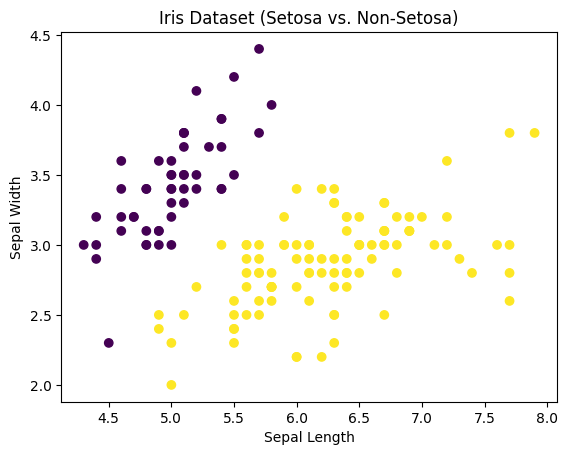

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)
# c=y specifies the color of each data point based on its class y 
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs. Non-Setosa)')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
class SVM:
    def __init__(self,lr=0.001,lambda_param=0.01,n_iters=1000):
        self.lr=lr
        self.lambda_param=lambda_param
        self.n_iters=n_iters
        self.w=None
        self.b=None

    def fit(self,X_train,y_train):
        n_samples,n_features=X_train.shape
        y=np.where(y_train<=0,-1,1)

        self.w=np.zeros(n_features)
        self.b=0

        for _ in range(self.n_iters):#iterate for n_iters times
            for idx,x_i in enumerate(X_train):
                condition=y[idx]*(np.dot(x_i,self.w)-self.b)>=1#check if datapoint is correctly classified 

                if condition:
                    self.w= self.w - (self.lr*(2*self.lambda_param*self.w))#if yes reduce overfitting
                else:
                    #update the weights using both the regularization term and a term that pulls the decision boundary
                    # toward the misclassified point
                    self.w= self.w - (self.lr*(2*self.lambda_param*self.w-np.dot(x_i,y[idx])))
                    # update the bias, shifting the decision boundary to better classify the point
                    self.b= self.b - (self.lr*y[idx])

    def predict(self,X_test):
        y_pred=np.dot(X_test,self.w)-self.b
        return np.sign(y_pred)

In [7]:
svc= SVM(lr=0.001, lambda_param=0.01, n_iters=1000)
svc.fit(X_train, y_train)

In [8]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


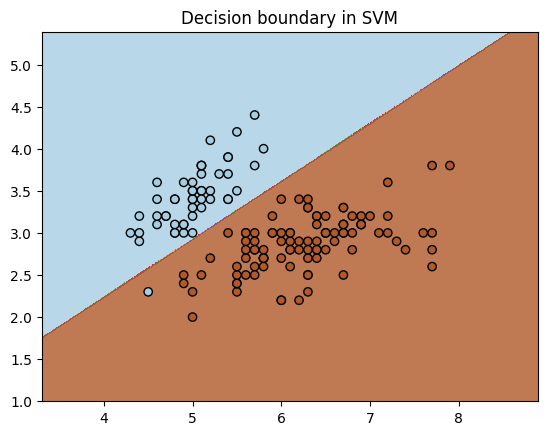

In [9]:
def plot_decision_boundary(X, y, model):
    #  values are adjusted by subtracting 1 from the minimum and adding 1 to the maximum to create a
    # small margin around the data for the plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # np.arange generates sequences of numbers from the minimum to the maximum values with a step size of 0.01 for both x and y axis
    # np.meshgrid creates a grid of all possible coordinate pairs from these sequences.
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max, 0.01))

    # ravel() is used to flatten arrays into 1D
    # np.c_ concatenates these flattened arrays column-wise, creating a single 2D array where 
    # each row is a coordinate pair (x, y). This array represents every point on the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.Paired)
    plt.title("Decision boundary in SVM")
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, svc)